## Bike Sharing Assignment

**1. DATA SOURCING AND PREPARATION**

In [1]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

# Importing required python libraries

import numpy as np
import pandas as pd
from math import sqrt

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries

#statsmodel library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Displaying all columns
pd.set_option('display.max_columns', 500)

In [2]:
# Reading the given CSV file to dataframe

df = pd.read_csv('day.csv')


**1.1 Inspecting the Application DataFrame**

In [3]:
# Viewing top 5 records

df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Determining the number of rows and columns

df.shape


(730, 16)

**`There are 730 rows and 16 colmns in the dataframe.`**

In [5]:
#statistical description of the numerical columns in the dataframe

df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Getting overall information for the dataframe

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**`'dteday' feature is of object datatype and rest are either of integer or float datatype.`**

**1.2 NULL Values Treatment**

In [7]:
#Checking missing values

df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**`There are no null values in the dataframe , so no need to do imputation.`**

**2. DATA CLEANING AND DATA MANIPULATION**

**2.1 Removing Unwanted Columns**

In [8]:
# Getting the list of all columns
df_columns = df.columns
df_columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [9]:
# Analysing 'instant' feature

print(df.shape)
print(df['instant'].nunique())


(730, 16)
730


**`There is no need to keep the instant feature as it is unique in the entire dataframe.'Year' & 'month' are already in the dataframe, so 'dteday' is not needed any more.`**

In [10]:
#Feature Selection

df_new = df.drop(columns=['dteday','instant'])

**`Here we find that sum of 'casual' and 'registered' gives the target variable. So these two features can also be dropped.`**

In [11]:
# Dropping 'casual','registered' features

df_new = df_new.drop(columns=['casual','registered'])

In [12]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**2.2 Renaming the columns**

In [13]:
#Renaming the columns for better understanding

df_new.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**2.3 Mapping the integral variables which are of categorical natre as per data dictionary**

In [14]:
#Mapping variables season, month, weathersit, weekday

df_new['season'] = df_new.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

df_new['month'] = df_new.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df_new['weathersit'] = df_new.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow and Light Rain',4:'Heavy Rain and Ice Pallets'})

df_new['weekday'] = df_new.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})



In [15]:
#Getting top 5 rows of dataframe

df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


**3. DATA VISUALISATION**

**3.1. Data visualisation for continuous variables**

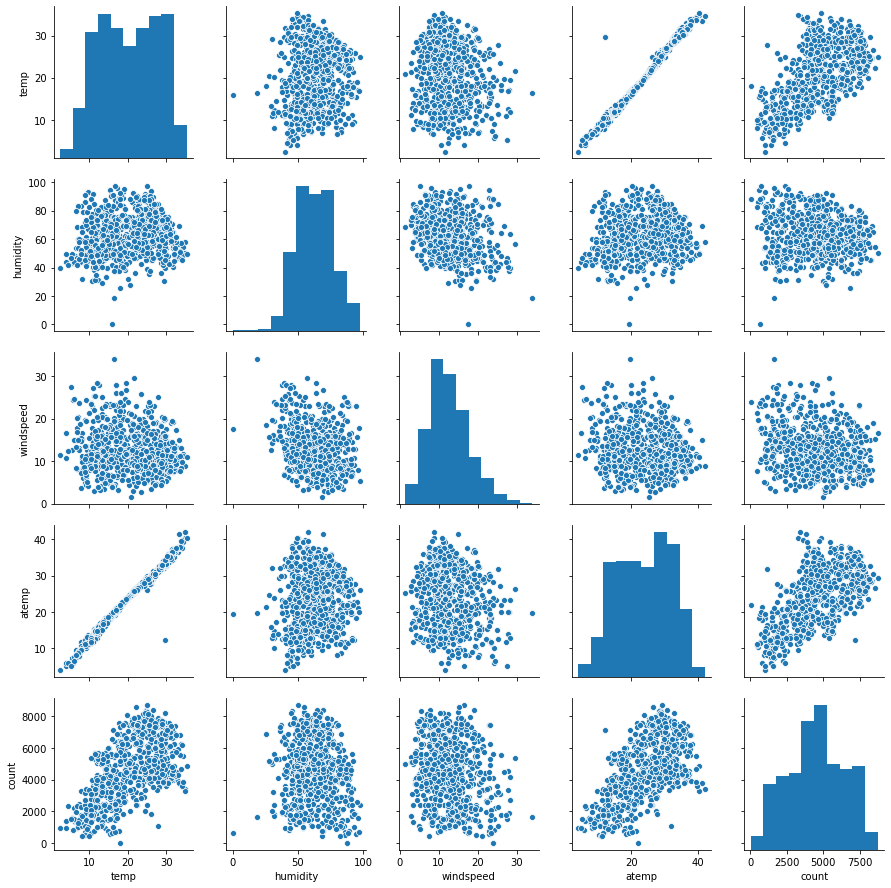

In [16]:
#Pairplot for numeric variables
sns.pairplot(df_new, vars=["temp", "humidity",'windspeed','atemp','count'])
plt.show()

**`By analysing all the plots above, we can see that there are some independent variables likwe temp and atemp which look positively correlated to the 'count' variable.`**

**3.2. Data visualisation for categorical variables**

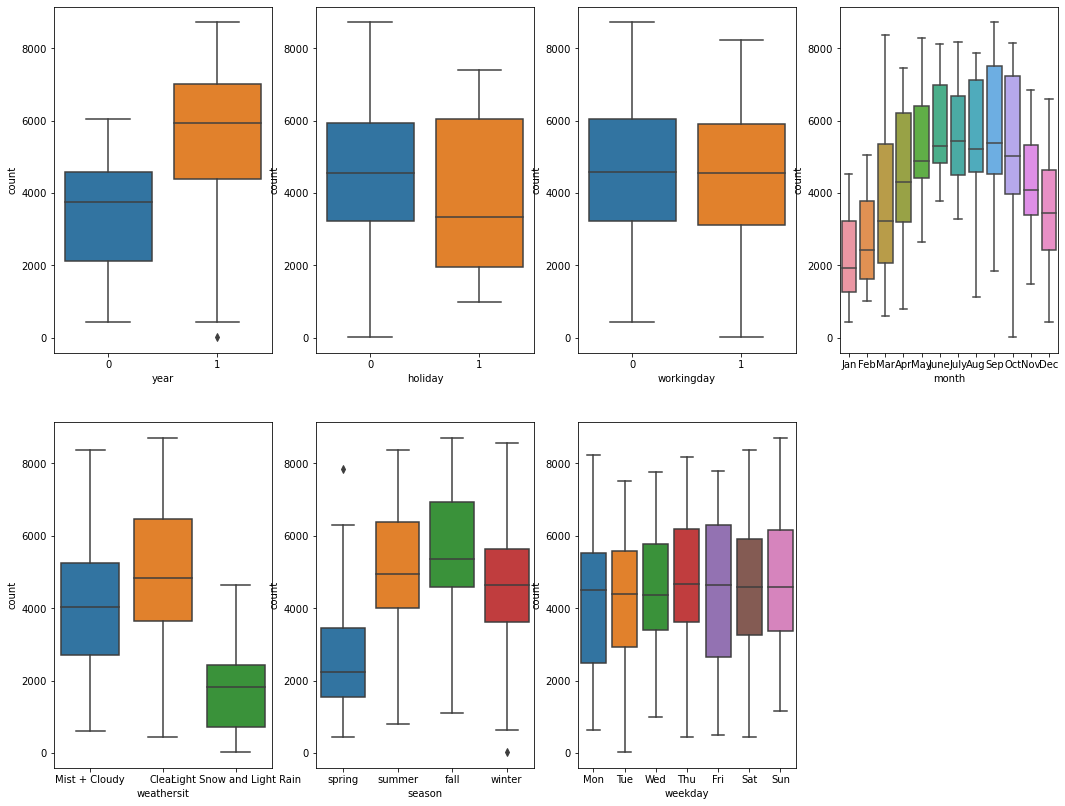

In [17]:
##Relationship between categorical and target variable

plt.figure(figsize=(18, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = df_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = df_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = df_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = df_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = df_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = df_new)
plt.show()

**`By looking at the above plots , we can conclude that :`**

**`-- Bike Rentals are more in the year 2019 as compared to 2018.`**

**`-- Bike rentals have more median when its holiday as compared to when its not holiday.`**

**`-- Bike rentals dont seem to have impact with respect to workingday.`**

**`-- Bike Rentals are more in the month of September.`**

**`-- Bike Rentals are more when weather is clear.`**

**`-- Bike Rentals are more during the Fall season and then in summer.`**

**`-- Bike Rentals are more on Saturday,wednesday and thursday.`**


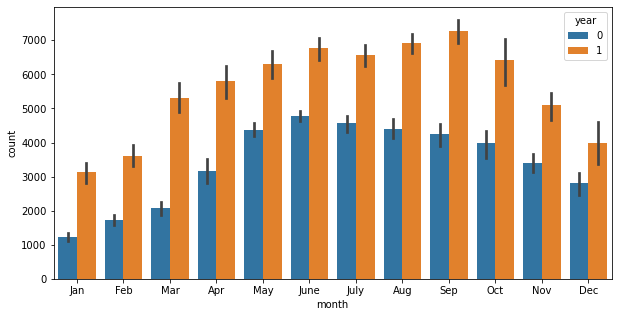

In [18]:
#Relation between month and year and count

plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=df_new)
plt.show()

**`June month is having more rentals in 2018.`**

**`October month is having more rentals in 2019.`**


**3.3 Correlation between variables.**

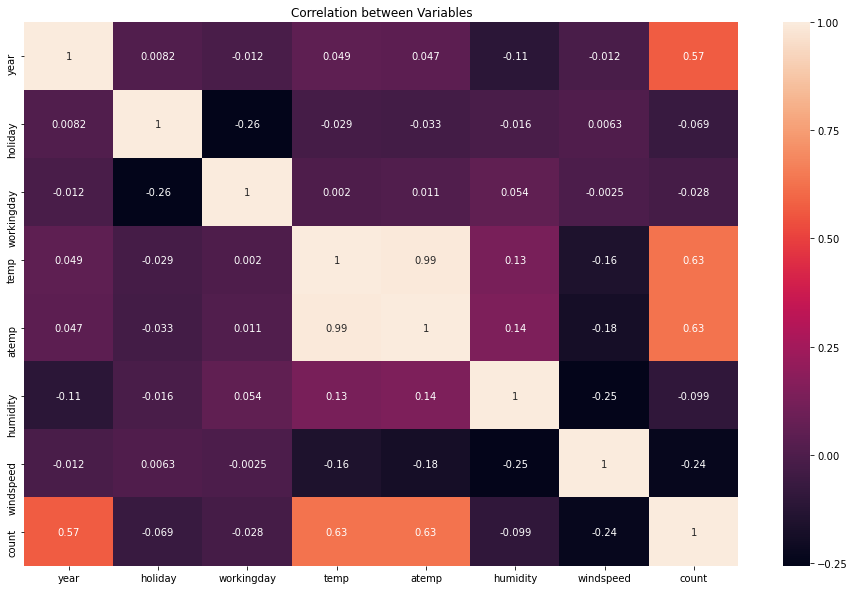

In [19]:
#Heatmap to see correlation between variables
plt.figure(figsize=(16, 10))
sns.heatmap(df_new.corr(), annot = True)
plt.title("Correlation between Variables")
plt.show()

**`As is visible from the heatmap, we can see temp, atemp variables are correlated with each other as well as to 'count' variable`** 



In [20]:
# dropping atemp variable
df_new1=df_new.drop(['atemp'], axis=1)
df_new1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


**3.4 Dummify the categorical features**

In [21]:
#  Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True

months=pd.get_dummies(df_new1.month,drop_first=True)
weekdays=pd.get_dummies(df_new1.weekday,drop_first=True)
weather_sit=pd.get_dummies(df_new1.weathersit,drop_first=True)
seasons=pd.get_dummies(df_new1.season,drop_first=True)



In [22]:
# Concatenating the dummy variables with original dataframe

df_new2=pd.concat([months,weekdays,weather_sit,seasons,df_new1],axis=1)

# Getting top 5 rows

df_new2.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Light Rain,Mist + Cloudy,spring,summer,winter,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
#Getting the number of rows and columns after we have created dummy variables

df_new2.shape

(730, 33)

In [24]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it.

df_new2.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

# Getting top 5 rows

df_new2.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Light Rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [25]:
#Getting the number of rows and columns after we have dropped above variables

df_new2.shape

(730, 29)

### 4. Splitting the Data into Training and Testing Sets

In [26]:
# splitting the data into train and test set

df_train, df_test = train_test_split(df_new2, train_size = 0.7, random_state = 100)

In [27]:
#Getting number of Rows and columns after splitting the data into train and test

print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### 5. Scaling the features

In [28]:
#Instantiate an object for MinMaxScaler
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Light Rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [29]:
# Creating X train and y Train

y_train = df_train.pop('count')
X_train = df_train


### 6. Building model using statsmodel and sklearn, for the detailed statistics

**6.1 Model 1**

In [30]:
#Instantiate an object for Linear Regression

lm = LinearRegression()

# Fitting the model

lm.fit(X_train, y_train)

# Getting 20 relevant features using RFE

rfe = RFE(lm, 15)   

# Fitting the model
rfe = rfe.fit(X_train, y_train)

In [31]:
#Getting the RFE ranking for each feature with RFE support

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow and Light Rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [32]:
# Getting the columns for which there is RFE support 

col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow and Light Rain',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'year', 'holiday',
       'temp', 'humidity', 'windspeed'],
      dtype='object')

In [33]:
# Getting the columns for which there is no RFE support 

X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()  

In [37]:
#Getting the summary of our linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        10:41:13   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3197      0.036      8.859      0.000       0.249       0.391
Dec                          -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                          -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July                         -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                          -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                           0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow and Light Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy                -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring                       -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                        0.0423      0.015      2.761      0.006       0.012       0.072
winter                        0.1019      0.018      5.656      0.000       0.067       0.137
year                          0.2304      0.008     28.487      0.000       0.215       0.246
holiday                      -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                          0.4815      0.037     13.005      0.000       0.409       0.554
humidity                     -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                    -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**` We see that Training Adjusted R2 is 0.840 and there are some variables which have p value more than 0.05. Lets start dropping one by one the features having high p value and high VPF`**

In [38]:
#Dropping the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,year,2.09
3,Nov,1.85
1,Jan,1.75


**`VIF for humidity and temp is more than 5.Lets try to get VIF under 5 for each feature`**

**6.2 Model 2**

In [40]:
#Dropping Dec feature based on p value
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

In [41]:
#Building the model after removing the feature
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.41e-189
Time:                        10:41:14   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [42]:
#Dropping the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [43]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.09
11,temp,16.80
13,windspeed,4.72
6,spring,4.37
8,winter,3.78
7,summer,2.80
5,Mist + Cloudy,2.29
9,year,2.09
0,Jan,1.67
2,Nov,1.60


**` Adj. R-squared has reduced slightly to 83.9.Lets drop 'Nov' based on high p value.`**

**6.3 Model 3**

In [44]:
#Dropping Nov based on high p value
X_train_new2 = X_train_new1.drop(["Nov"], axis = 1)

In [45]:
#Building the model after removing the feature
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.59e-190
Time:                        10:41:14   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
#Dropping the constant term B0
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [47]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,29.02
10,temp,16.71
12,windspeed,4.66
5,spring,4.34
7,winter,3.36
6,summer,2.79
4,Mist + Cloudy,2.29
8,year,2.09
0,Jan,1.67
1,July,1.59


**`Adj. R-squared remain the same but p value of 'Jan' got increased. Lets drop it.`**

**6.4 Model 4**

In [48]:
#Drop January
X_train_new3 = X_train_new2.drop(["Jan"], axis = 1)

In [49]:
#Building the model after removing the feature
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.95e-190
Time:                        10:41:15   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
#Dropping the constant term B0
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,28.03
9,temp,16.03
11,windspeed,4.65
4,spring,4.01
6,winter,3.33
5,summer,2.79
3,Mist + Cloudy,2.28
7,year,2.08
0,July,1.58
1,Sep,1.38


**`Now we see that all features have low p value now , but VIF is more for two features. Lets deal with them`**

**6.5 Model 5**

In [52]:
#Dropping humidity featuure based on high VIF
X_train_new4 = X_train_new3.drop(["humidity"], axis = 1)

In [53]:
#Building the model after removing the feature
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        10:41:15   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [54]:
#Dropping the constant term B0
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [55]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,year,2.07
6,winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow and Light Rain,1.08


**`Now we see that all features have low p value now , but VIF is more for temp feature.But we can't delete temp feature as it has the highest correlation with traget variable.Instead lets drop feature with 2nd highest VIF-windspeed. Lets deal with them`**

**6.6 Model 6**

In [56]:
#Dropping windspeed
X_train_new5 = X_train_new4.drop(["windspeed"], axis = 1)

In [57]:
#Building the model after removing the feature
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.71e-181
Time:                        10:41:15   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [58]:
#Dropping the constant term B0
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.22
7,year,2.06
5,summer,1.94
0,July,1.58
6,winter,1.57
3,Mist + Cloudy,1.55
4,spring,1.40
1,Sep,1.34
2,Light Snow and Light Rain,1.07
8,holiday,1.04


**`This model looks good, as all featuures have p value less than 0.05 and VIF for all features less  than 5. All predictors seems to be significant.`**

**`F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is 233.6 which is good, also the Prob (F-statistic): 4.48e-181 which is ~0 , so this model is acceptable for now , until we find any major changes while evaluating test data`**

**6.7 Interpretation of coefficients**

In [60]:
# Checking the parameters obtained
lm5.params

const                        0.150081
July                        -0.052338
Sep                          0.081182
Light Snow and Light Rain   -0.298944
Mist + Cloudy               -0.078458
spring                      -0.076589
summer                       0.036651
winter                       0.082879
year                         0.232598
holiday                     -0.100259
temp                         0.502913
dtype: float64

**`const : The Constant value of ‘0.150081’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.`**


**`July : A coefficient value of ‘-0.052338’ indicated that a unit increase in July variable, decreases the bike hire numbers by 0.052338 units.`**


**`Sep : A coefficient value of ‘0.081182’ indicated that, a unit increase in Sep variable increases the bike hire numbers by 0.081182 units.`**


**`Light Snow and Light Rain : A coefficient value of -0.298944’ indicated that a unit increase in Light Snow and Light Rain variable, decreases the bike hire numbers by 0.298944 units.`**


**`Mist + Cloudy  : A coefficient value of ‘-0.078458’ indicated that, a unit increase in Mist + Cloudy variable decreases the bike hire numbers by 0.078458 units.`**


**`spring : A coefficient value of ‘-0.076589’ indicated that a unit increase in spring variable decreases the bike hire numbers by 0.076589 units.`**


**`summer : A coefficient value of ‘0.036651’ indicated that a unit increase in summer variable increases the bike hire numbers by 0.036651 units.`**


**`winter : A coefficient value of ‘0.082879’ indicated that a unit increase in winter variable increases the bike hire numbers by 0.082879 units.`**


**`year  : A coefficient value of ‘0.232598’ indicated that, a unit increase in year variable, decreases the bike hire numbers by 0.232598 units.`**


**`holiday : A coefficient value of ‘-0.100259’ indicated that a unit increase in holiday variable, decreases the bike hire numbers by 0.100259 units.`**


**`temp : A coefficient value of ‘0.502913’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.502913 units.`**

#### 7 Final Model Interpretation

**7.1 Hypothesis Testing**

Hypothesis Testing States that
H0:B1=B2=...=Bn=0
H1: at least one Bi!=0


**`From the lm5 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS`**

### Step 7: Model Validation


In [61]:
# Finding y train predicted

X_train_lm5=sm.add_constant(X_train_lm5)
y_train_pred = lm5.predict(X_train_lm5)

**`Validating the assumptions of Linear Regression Model`**



1. Linear Relationship

2. Homoscedasticity

3. Absence of Multicollinearity

4. Independence of residuals

5. Normality of Errors

**7.1 Linear Relationship :** 
    
While plotting pairplot , we already observed that some features have linear relationship with the target variable.

**7.2 Homoscedasticity :**

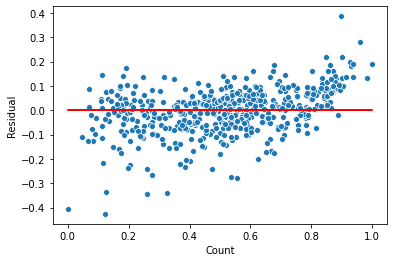

In [62]:
# plotting the residuals to see if there is any pattern.

y_train_pred = lm5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**`There is no visible pattern in residual values, thus homoscedacity is well preserved.`**

**7.3 Absence of Multicollinearity**

**`We have already verified VIF for this variabble.All the predictor variables have VIF value less than 5. So we can consider that there is not much multicolinearity among the predictor variables.`**

**7.4 Independence of Residuals**

In [63]:
# Using Durbin-Watson value for detecting any autocorrelation

print('The Durbin-Watson value for Final Model lm5 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lm5 is 2.0439


**`There is almost no autocorrelation.`**

**7.5 Normality of Errors**

<Figure size 432x288 with 0 Axes>

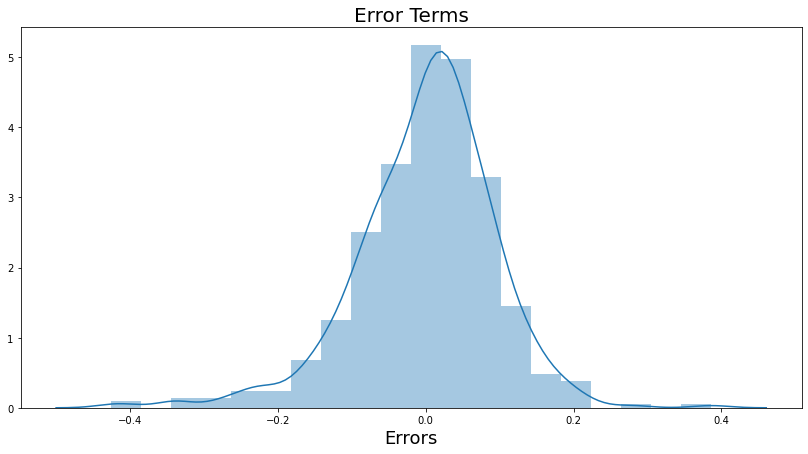

In [64]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

**`The error terms appear to be normal. So we are good to accept this model and proceed for test prediction.`**

###  8: Making Predictions using final model

In [65]:
# Displaying top 5 records for test dataset

df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Light Rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,19.270000,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,29.315000,30.5000,19.583229,4968


**8.1 Scaling the test data**

In [66]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Light Rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


**8.2 Dividing test data into X_test and y_test**

In [67]:
#Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Light Rain,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


**8.3 Predicting the model**

In [68]:
# Getting the Columns of X_train
X_train_new5.columns

Index(['July', 'Sep', 'Light Snow and Light Rain', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'temp'],
      dtype='object')

In [69]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Light Snow and Light Rain,Mist + Cloudy,spring,summer,winter,year,holiday,temp
184,1.0,1,0,0,1,0,0,0,0,1,0.831783
535,1.0,0,0,0,0,0,1,0,1,0,0.901354
299,1.0,0,0,0,1,0,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,1,0,0,0,0.817246


In [70]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

**8.4 Model Evaluation**

**8.4.1 r2 score**

In [71]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
x = r2_score(y_test,y_pred)
x

0.8092660294132242

**8.4.2 Adjusted R2 Score**

In [72]:
# n is number of rows in test dataset
n = X_test_new1.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new1.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-x)*(n-1)/(n-p-1),4)
adjusted_r2

0.7992

**8.4.3 Comparing r2 score for train and test dataset.**

In [73]:
R2_Train =  0.824
R2_Test =  0.809

Difference between R2_Train and R2_Test

In [74]:
(R2_Train-R2_Test)/R2_Train *100

1.8203883495145512

**`The difference is less than 3 percent.So this is a good model.`**

**8.4.4 Comparing Adjuusted r2 score for train and test dataset.**

In [75]:
Adjusted_R2_Train = 0.820
AdjustedR2_Test = 0.7992

Difference between Adjusted_R2_Train and Adjusted_R2_Test

In [76]:
(Adjusted_R2_Train-AdjustedR2_Test)/R2_Train *100

2.5242718446601855

**`The difference is less than 3 percent.So this is a good model.`**